# 1. Aim:

To study and implement Logistic Regression.

# 2. Theory:

## 2.1 What is Logistic Regression?
Logistic regression is a type of classification algorithm used to predict the probability of a binary or categorical outcome (such as a "yes" or "no" answer, or the presence or absence of a particular characteristic) based on one or more predictor variables.

In logistic regression, the dependent variable is binary or categorical, and the independent variables (also called predictors or features) can be either continuous or categorical. The goal of logistic regression is to find the best fitting model that relates the predictors to the outcome variable.

## 2.2 How Logistic Regression works?
The logistic regression model uses a logistic function (also known as the sigmoid function) to transform the output of a linear equation to a value between 0 and 1, which represents the probability of the binary outcome. The logistic function has an S-shaped curve and is defined as:

p = 1 / (1 + e^-z)

where p is the probability of the binary outcome, z is the output of the linear equation, and e is the mathematical constant approximately equal to 2.71828.

<img source="https://mathequalslove.net/wp-content/uploads/2021/01/Logistic-Function.png"></img>

The logistic regression model estimates the parameters of the linear equation using a maximum likelihood approach, which seeks to maximize the likelihood of the observed data given the model parameters. Once the model is trained, it can be used to make predictions on new data by estimating the probability of the binary outcome based on the values of the predictor variables.

## 2.3 Plot of Logistic Function using *numpy* & *matplotlib*

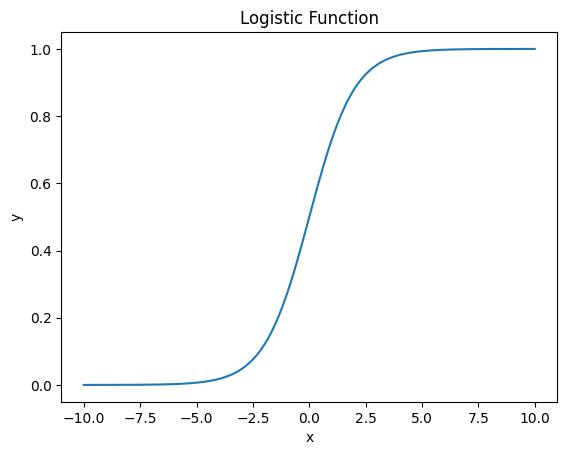

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 1000)
y = logistic(x)

plt.plot(x, y)
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3. Implementation:

## 3.1 Importing packages and dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3.2 Exploratory Data Analysis (EDA) on the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

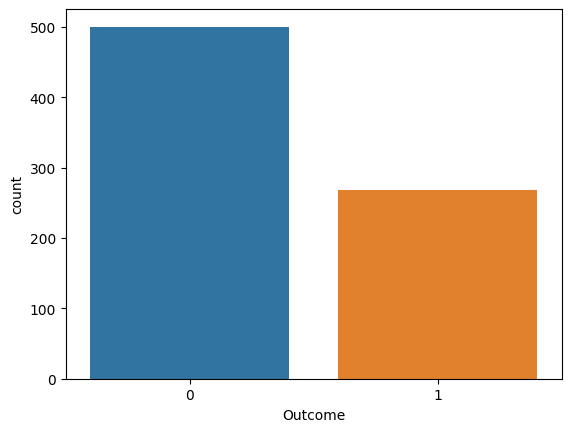

In [7]:
sns.countplot(x='Outcome', data=df)

<Axes: xlabel='Age', ylabel='Count'>

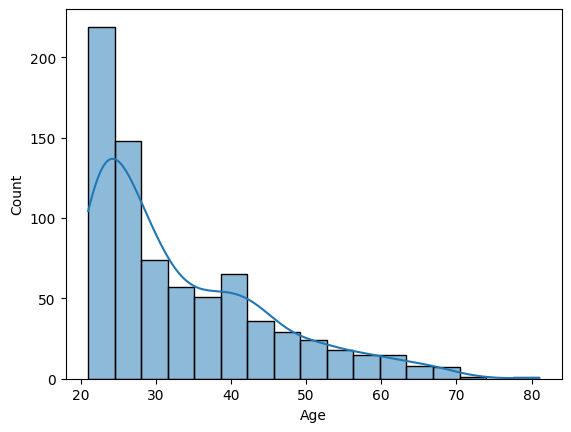

In [8]:
sns.histplot(df['Age'].dropna(),kde=True)

<Axes: >

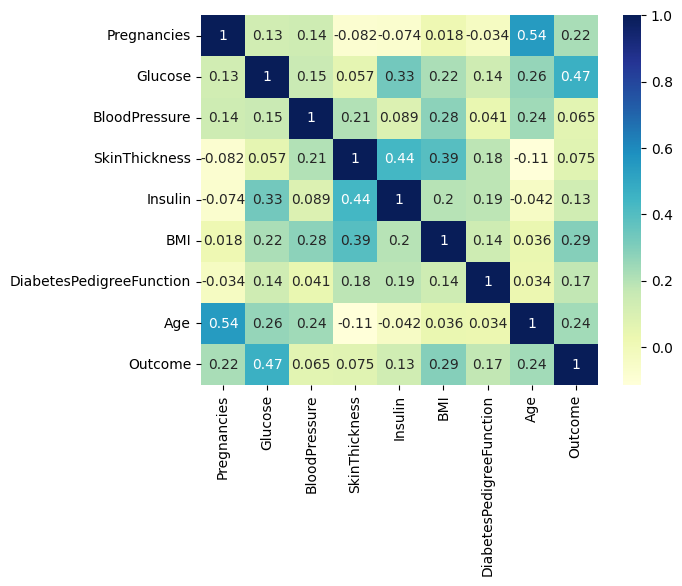

In [9]:
corr=df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

## 3.3 Data Preprocessing

### 3.3.1 Min-Max Scaling
MinMaxScaler is a data preprocessing technique in the scikit-learn library for scaling numerical data to a specified range (usually between 0 and 1). It is a common technique used in machine learning to preprocess data before training a model.

The MinMaxScaler scales the data by subtracting the minimum value of the feature and then dividing by the range (the difference between the maximum and minimum values).

The formula for scaling a feature using MinMaxScaler is:

X_scaled = (X - X_min) / (X_max - X_min)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_cols = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

### 3.3.2 Train Test Split
In machine learning, it is common practice to split the available data into two sets: a training set and a test set. The training set is used to fit the model, while the test set is used to evaluate the performance of the model on new, unseen data.

The scikit-learn library provides a convenient train_test_split function to split the data into training and test sets.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

## 3.4 Model Building and Evaluation

### 3.4.1 Logistic Regression
In scikit-learn, logistic regression is implemented through the LogisticRegression class.

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

preds=model.predict(x_test)

### 3.4.2 Classification Report
In scikit-learn, the classification_report function can be used to generate a text report showing the main classification metrics for a classification model.

The classification report shows several metrics for each class, including precision, recall, F1-score, and support.
- Precision is the proportion of true positive predictions among all positive predictions.
- recall is the proportion of true positive predictions among all actual positive instances. 
- The F1-score is the harmonic mean of precision and recall, and provides a balanced measure of both metrics. 
- The support is the number of actual instances of each class in the test set.

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.56      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



### 3.4.3 Confusion Matrix
A confusion matrix is a table that summarizes the performance of a classification model by comparing its predicted labels to the true labels. It is a useful tool for evaluating the accuracy of a classification model, especially when dealing with imbalanced datasets where some classes have much fewer instances than others.

In scikit-learn, the confusion_matrix function can be used to compute the confusion matrix for a classification model. 

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)

array([[136,  14],
       [ 36,  45]])

### 3.4.4 Model Score
In scikit-learn, the score function is used to compute the mean accuracy of a logistic regression model. The score function takes as input the features X and the true labels y, and returns the mean accuracy of the model on the given data.

In [16]:
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.7835497835497836
